<a href="https://colab.research.google.com/github/GesielRodrigues/Curso_PMF/blob/main/PMF_M%C3%B3dulo_02_Manipula%C3%A7%C3%A3o_de_Dados_com_Pandas_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/PMF%20002.png?raw=true" width = "700">

---
# **Módulo 02 - Manipulação de Dados com Pandas**
---

# 3. Consolidação de dataframes

## 3.1. Obtenção de dados

**ATENÇÃO**

Em caso de não funcionamento de alguma das bibliotecas de puxar os dados utilizar o arquivo Excel Baixado abaixo.

In [1]:
# Arquivo Excel com os dados
!gdown --id "1MKyNZGKtQbAqqN_NuGBGTD-dD-zhj2Vw"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MKyNZGKtQbAqqN_NuGBGTD-dD-zhj2Vw
To: /content/dados_concatenar_dfs.xlsx
100% 454k/454k [00:00<00:00, 85.7MB/s]


In [2]:
!pip install yfinance
# !pip install --upgrade --no-cache-dir git+https://github.com/baselsm/tvdatafeed.git # Lib parou de funcionar

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
# from tvDatafeed import TvDatafeed, Interval

In [4]:
# Obtendo os dados usando arquivo Excel em caso de falha das bibliotecas yfinance ou TvDatafeed

# ibov_yf = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='ibov_yf', index_col='Date', parse_dates=True)
# ibov_tv = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='ibov_tv', index_col=0, parse_dates=True)
# petr4_ohlc = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='petr4_ohlc', index_col='Date', parse_dates=True)
# petr4_dividendos = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='petr4_dividends', index_col=0, parse_dates=True)

In [5]:
petr4_ohlc = yf.download('PETR4.SA', period = 'max')
petr4_ohlc.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.506321,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.422993,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.408634,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.403763,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.410173,20912640000


In [6]:
petr4_dividendos = yf.Ticker('PETR4.SA').dividends

# Deixando o indice apenas com a data (removendo horario)
petr4_dividendos.index = pd.to_datetime(petr4_dividendos.index.date)
petr4_dividendos.head()

2005-04-01    0.133288
2005-07-01    0.250663
2006-01-02    0.259000
2006-04-04    0.132700
2006-11-01    0.500750
Name: Dividends, dtype: float64

Agora vamos capturar os dados do IBOV

In [8]:
ibov_yf = yf.download('^BVSP', start = '2015-01-01', end = '2023-04-26', auto_adjust= True)

# Renomeando os nomes das colunas, convertendo para tudo minúsculo
ibov_yf = ibov_yf.rename(columns = str.lower)
ibov_yf

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,volume
Date,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,2882100
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900
...,...,...,...,...,...
2023-04-18,106023.0,106475.0,105122.0,106163.0,11207900
2023-04-19,106149.0,106149.0,103604.0,103913.0,12713600
2023-04-20,103913.0,104615.0,103087.0,104367.0,12378000


Agora vamos utilizar a TVDataFeed, que extrai dados do Trading View, para capturar os dados do IBOV

**A lib TVDataFeed não está funcionando, por isso pegaremos os dados disponibilizados no arquivo excel, na planilha ibov_tv**

In [9]:
# ibov_tv = TvDatafeed().get_hist(symbol='IBOV', exchange='BMFBOVESPA', interval=Interval.in_daily, n_bars=10000)
ibov_tv = pd.read_excel('dados_concatenar_dfs.xlsx',
                        sheet_name='ibov_tv', index_col=0,
                        parse_dates=True)


# Filtrando os dados de janeiro de 2015 pra frente para ficar igual aos dados puxados do Yahoo Finance
ibov_tv = ibov_tv.loc['2015-01-01':]

# Retirando a hora do índice
ibov_tv.index = pd.to_datetime(ibov_tv.index.date)

# Nomeando a coluna de índice
ibov_tv.index.name = 'Date'

ibov_tv

,symbol,open,high,low,close,volume
Date,,,,,,
2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0
2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0
2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0
2015-01-07,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0
2015-01-08,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0
...,...,...,...,...,...,...
2023-04-18,BMFBOVESPA:IBOV,106022.520,106474.750,105121.740,106163.230,0
2023-04-19,BMFBOVESPA:IBOV,106148.970,106148.970,103603.700,103912.940,0
2023-04-20,BMFBOVESPA:IBOV,103913.470,104615.180,103086.980,104366.820,0


## 3.2. Comparação se os dataframes são iguais

Podemos checar simplesmente se são iguais ou não utilizando a função .equals

In [10]:
pd.DataFrame.equals(ibov_yf, ibov_tv)

False

In [11]:
# Vamos checar se pelo menos open e close são iguais
pd.DataFrame.equals(ibov_yf[['open', 'close']] , ibov_tv[['open', 'close']])

False

Podemos identificar quais colunas são diferentes utilizando o método symmetric_differences dos conjuntos (set)

In [12]:
# A coluna Symbol é diferente nos dataframes
set(ibov_yf).symmetric_difference(ibov_tv)

{'symbol'}

Checar exatamente o que tem de diferente nos DataFrames (neste exemplo baseamos no index)

In [13]:
ibov_yf[~ibov_yf.index.isin(ibov_tv.index)]

,open,high,low,close,volume
Date,,,,,
2017-12-29,76077.0,76437.0,76077.0,76402.0,0


## 3.3. Função merge

**A função merge é similar ao PROCV (VLOOKUP) do Excel**

Operação realizada para unir dois dataframes diferentes.

Estes dataframes podem ou não conter dados para os mesmos indivíduos, observações  ou datas, por isso é necessário especificar qual tipo de join vamos aplicar.


<img src="https://alishoff.com/media/uploads/files/joins.png" width="500" align="left"/>

In [14]:
petr4_ohlc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.506321,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.422993,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.408634,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.403763,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.410173,20912640000


In [15]:
petr4_dividendos.head()

2005-04-01    0.133288
2005-07-01    0.250663
2006-01-02    0.259000
2006-04-04    0.132700
2006-11-01    0.500750
Name: Dividends, dtype: float64

Usar o right join para manter apenas fechamentos em que houve pagamento de dividendos

In [16]:
df_merge_close_div = pd.merge(petr4_ohlc['Close'], petr4_dividendos, how='right', left_index=True, right_index=True)
df_merge_close_div.head()

,Close,Dividends
2005-04-01,12.98750,0.133288
2005-07-01,13.52375,0.250663
2006-01-02,19.04500,0.259000
2006-04-04,21.64500,0.132700
2006-11-01,21.22500,0.500750


Usar o "outer join" para checar dados presente em apenas um dos dataframes, utilizando o indicator=True

In [17]:
df_merge_yf_tv = pd.merge(ibov_yf['close'],  ibov_tv['close'], how='outer', left_index=True, right_index=True, indicator=True)
df_merge_yf_tv.head()

,close_x,close_y,_merge
Date,,,
2015-01-02,48512.0,48512.219,both
2015-01-05,47517.0,47516.820,both
2015-01-06,48001.0,48000.922,both
2015-01-07,49463.0,49462.910,both
2015-01-08,49943.0,49943.301,both


O parametro indicator=True cria uma nova coluna, dizendo onde a informação está (ambos, apenas na direita ou apenas na esquerda)

In [18]:
df_merge_yf_tv['_merge'].value_counts()

both          2057
right_only       2
left_only        1
Name: _merge, dtype: int64

Podemos fazer um filtro para pegar as datas divergentes entre os dois DataFrames

In [19]:
df_merge_yf_tv[df_merge_yf_tv._merge != 'both']

,close_x,close_y,_merge
Date,,,
2017-12-29,76402.0,NaN,left_only
2018-11-20,NaN,87900.828,right_only
2020-11-20,NaN,106042.480,right_only


Para exemplificar os parâmetros "on" e "suffixes" vamos editar os dados dos dfs

In [20]:
# Incluindo uma coluna em comum em ambos os DFs
ibov_yf['Data'] = ibov_yf.index
ibov_tv['Data'] = ibov_tv.index

In [21]:
ibov_yf.head()

,open,high,low,close,volume,Data
Date,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,2882100,2015-01-02
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100,2015-01-05
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300,2015-01-06
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800,2015-01-07
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900,2015-01-08


In [22]:
ibov_tv.head()

,symbol,open,high,low,close,volume,Data
Date,,,,,,,
2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0,2015-01-02
2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0,2015-01-05
2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0,2015-01-06
2015-01-07,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0,2015-01-07
2015-01-08,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0,2015-01-08


In [23]:
# Fazer um merge utilizando o parametro on='Data' (coluna em comum) e passando os suffixes
df_merge_yf_tv2 = pd.merge(ibov_yf[['Data', 'close']],  ibov_tv[['Data', 'close']],
                           how='inner', on='Data', suffixes=['_yf','_tv'])

df_merge_yf_tv2.head()

,Data,close_yf,close_tv
0,2015-01-02,48512.0,48512.219
1,2015-01-05,47517.0,47516.820
2,2015-01-06,48001.0,48000.922
3,2015-01-07,49463.0,49462.910
4,2015-01-08,49943.0,49943.301


## 3.4. Concatenar dataframes

Para concatenar dataframes utilizamos a função Pandas.concat

In [24]:
# Empilhando um dataframe embaixo do outro, passando o parametro axis=0
ibov_concat_abaixo = pd.concat([ibov_yf, ibov_tv], axis=0)
ibov_concat_abaixo

,open,high,low,close,volume,Data,symbol
Date,,,,,,,
2015-01-02,50005.00,50005.00,48345.00,48512.00,2882100,2015-01-02,NaN
2015-01-05,48512.00,48512.00,47264.00,47517.00,3866100,2015-01-05,NaN
2015-01-06,47517.00,48061.00,47338.00,48001.00,4559300,2015-01-06,NaN
2015-01-07,48006.00,49882.00,48006.00,49463.00,4408800,2015-01-07,NaN
2015-01-08,49463.00,50261.00,49017.00,49943.00,3621900,2015-01-08,NaN
...,...,...,...,...,...,...,...
2023-04-18,106022.52,106474.75,105121.74,106163.23,0,2023-04-18,BMFBOVESPA:IBOV
2023-04-19,106148.97,106148.97,103603.70,103912.94,0,2023-04-19,BMFBOVESPA:IBOV
2023-04-20,103913.47,104615.18,103086.98,104366.82,0,2023-04-20,BMFBOVESPA:IBOV


In [25]:
# Ordenando pelo index (data) veremos uma linha de cada seguidas
ibov_concat_abaixo = ibov_concat_abaixo.sort_index()
ibov_concat_abaixo.head()

,open,high,low,close,volume,Data,symbol
Date,,,,,,,
2015-01-02,50005.000,50005.000,48345.000,48512.000,2882100,2015-01-02,NaN
2015-01-02,50004.500,50004.500,48345.262,48512.219,0,2015-01-02,BMFBOVESPA:IBOV
2015-01-05,48512.219,48512.219,47263.910,47516.820,0,2015-01-05,BMFBOVESPA:IBOV
2015-01-05,48512.000,48512.000,47264.000,47517.000,3866100,2015-01-05,NaN
2015-01-06,47517.141,48061.281,47337.711,48000.922,0,2015-01-06,BMFBOVESPA:IBOV


Ignorar indice dependendo dos dataframes (mais utilizado quando não envolve datas)

Possui o parâmetro join (funcionalmente similar ao do merge) porem apenas outer/inner

In [26]:
ibov_concat_abaixo = pd.concat([ibov_yf, ibov_tv], axis = 0, ignore_index = True, join = 'outer')
ibov_concat_abaixo

,open,high,low,close,volume,Data,symbol
0,50005.00,50005.00,48345.00,48512.00,2882100,2015-01-02,NaN
1,48512.00,48512.00,47264.00,47517.00,3866100,2015-01-05,NaN
2,47517.00,48061.00,47338.00,48001.00,4559300,2015-01-06,NaN
3,48006.00,49882.00,48006.00,49463.00,4408800,2015-01-07,NaN
4,49463.00,50261.00,49017.00,49943.00,3621900,2015-01-08,NaN
...,...,...,...,...,...,...,...
4112,106022.52,106474.75,105121.74,106163.23,0,2023-04-18,BMFBOVESPA:IBOV
4113,106148.97,106148.97,103603.70,103912.94,0,2023-04-19,BMFBOVESPA:IBOV
4114,103913.47,104615.18,103086.98,104366.82,0,2023-04-20,BMFBOVESPA:IBOV
4115,104366.82,104821.97,103247.04,103946.58,0,2023-04-24,BMFBOVESPA:IBOV


In [27]:
print(ibov_yf.shape)
print(ibov_tv.shape)

(2058, 6)
(2059, 7)


In [28]:
# Concatenando um dataframe ao lado do outro linhas que tenham em um e não no outro são preenchidas com NaN
pd.concat([ibov_yf, ibov_tv], axis = 1)

,open,high,low,close,volume,Data,symbol,open,high,low,close,volume,Data
Date,,,,,,,,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,2882100.0,2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0.0,2015-01-02
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100.0,2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0.0,2015-01-05
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300.0,2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0.0,2015-01-06
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800.0,2015-01-07,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0.0,2015-01-07
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900.0,2015-01-08,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0.0,2015-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18,106023.0,106475.0,105122.0,106163.0,11207900.0,2023-04-18,BMFBOVESPA:IBOV,106022.520,106474.750,105121.740,106163.230,0.0,2023-04-18
2023-04-19,106149.0,106149.0,103604.0,103913.0,12713600.0,2023-04-19,BMFBOVESPA:IBOV,106148.970,106148.970,103603.700,103912.940,0.0,2023-04-19
2023-04-20,103913.0,104615.0,103087.0,104367.0,12378000.0,2023-04-20,BMFBOVESPA:IBOV,103913.470,104615.180,103086.980,104366.820,0.0,2023-04-20


## 3.5. Binning

Realizamos essa operação quando precisamos criar variáveis qualitativas que representam as categorias de uma variável numérica anterior.

Para realizar a operação de binning, vamos criar algumas colunas novas.

Binning manual

Criação de uma coluna que diz se o resultado dia foi positivo ou negativo:

In [29]:
ibov_yf.head()

,open,high,low,close,volume,Data
Date,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,2882100,2015-01-02
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100,2015-01-05
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300,2015-01-06
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800,2015-01-07
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900,2015-01-08


In [30]:
ibov_yf['resultado'] = ibov_yf.close.pct_change()*100

In [31]:
ibov_yf = ibov_yf.dropna()

In [32]:
ibov_yf.head()

,open,high,low,close,volume,Data,resultado
Date,,,,,,,
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100,2015-01-05,-2.051039
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300,2015-01-06,1.018583
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800,2015-01-07,3.045770
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900,2015-01-08,0.970422
2015-01-09,49955.0,49955.0,48501.0,48840.0,2999200,2015-01-09,-2.208518


In [33]:
results_binning = np.sign(ibov_yf['resultado']).value_counts()

results_binning

 1.0    1071
-1.0     985
 0.0       1
Name: resultado, dtype: int64

A função `sign` da biblioteca NumPy é usada para retornar o sinal de cada elemento de um array. O sinal de um número é definido como:

1, se o número for positivo;
-1, se o número for negativo;
0, se o número for nulo.

In [34]:
# Percentual dos dias positivos
dias_positivos = results_binning[1] / sum(results_binning) * 100

dias_positivos

52.066115702479344

Vamos armazenar esse resultado binário usando a numpy

In [35]:
ibov_yf['result_binario'] = np.where(ibov_yf['resultado'] > 0,'positivo','negativo')

ibov_yf.head()

<ipython-input-35-71753ded3e30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['result_binario'] = np.where(ibov_yf['resultado'] > 0,'positivo','negativo')


,open,high,low,close,volume,Data,resultado,result_binario
Date,,,,,,,,
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100,2015-01-05,-2.051039,negativo
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300,2015-01-06,1.018583,positivo
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800,2015-01-07,3.045770,positivo
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900,2015-01-08,0.970422,positivo
2015-01-09,49955.0,49955.0,48501.0,48840.0,2999200,2015-01-09,-2.208518,negativo


Podemos também criar mais de duas categorias

In [36]:
# Encadeando a função np.where para criar mais de duas categorias
ibov_yf['resultado_tres'] = np.where(ibov_yf['resultado'] > 1, 'maior_que_1%', \
                                          (np.where(ibov_yf['resultado'] >= 0, \
                                                    'zero_a_1%', 'negativo')))

ibov_yf.head()

<ipython-input-36-7c7e50ef9cfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['resultado_tres'] = np.where(ibov_yf['resultado'] > 1, 'maior_que_1%', \


,open,high,low,close,volume,Data,resultado,result_binario,resultado_tres
Date,,,,,,,,,
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100,2015-01-05,-2.051039,negativo,negativo
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300,2015-01-06,1.018583,positivo,maior_que_1%
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800,2015-01-07,3.045770,positivo,maior_que_1%
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900,2015-01-08,0.970422,positivo,zero_a_1%
2015-01-09,49955.0,49955.0,48501.0,48840.0,2999200,2015-01-09,-2.208518,negativo,negativo


## 3.6. Crosstab

Criação uma nova tabela cruzada de frequência com base em informações solicitadas.

No exemplo abaixo, estamos obtendo a frequência de pregões em cada uma das 3 categorias para cada dia da semana

In [37]:
# Criando a coluna com o nome do dia da semana
ibov_yf['dia_semana'] = ibov_yf.index.strftime('%A')

ibov_yf.head()

<ipython-input-37-6f5da224ef5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['dia_semana'] = ibov_yf.index.strftime('%A')


,open,high,low,close,volume,Data,resultado,result_binario,resultado_tres,dia_semana
Date,,,,,,,,,,
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100,2015-01-05,-2.051039,negativo,negativo,Monday
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300,2015-01-06,1.018583,positivo,maior_que_1%,Tuesday
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800,2015-01-07,3.045770,positivo,maior_que_1%,Wednesday
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900,2015-01-08,0.970422,positivo,zero_a_1%,Thursday
2015-01-09,49955.0,49955.0,48501.0,48840.0,2999200,2015-01-09,-2.208518,negativo,negativo,Friday


In [39]:
# Fazendo um crosstab do dia da semana com o resultado_tres
crosstab_dias_semana = pd.crosstab(ibov_yf['dia_semana'], ibov_yf['resultado_tres'])

crosstab_dias_semana

resultado_tres,maior_que_1%,negativo,zero_a_1%
dia_semana,,,
Friday,84,201,119
Monday,86,206,117
Thursday,91,198,124
Tuesday,103,191,117
Wednesday,120,189,111


Vamos criar algumas colunas auxiliares para demonstrar em termos percentuais a ocorrência das categorias

In [40]:
# Coluna de totais
crosstab_dias_semana['Total_dias'] = crosstab_dias_semana.sum(axis = 1)

# Linha de totais
crosstab_dias_semana.loc['Total_valores'] = crosstab_dias_semana.sum(axis = 0)

# Coluna de % de dias negativos
crosstab_dias_semana['Neg_%'] =  (crosstab_dias_semana['negativo'] / crosstab_dias_semana['Total_dias']) * 100

crosstab_dias_semana

resultado_tres,maior_que_1%,negativo,zero_a_1%,Total_dias,Neg_%
dia_semana,,,,,
Friday,84,201,119,404,49.752475
Monday,86,206,117,409,50.366748
Thursday,91,198,124,413,47.941889
Tuesday,103,191,117,411,46.472019
Wednesday,120,189,111,420,45.000000
Total_valores,484,985,588,2057,47.885270


## 3.7. Pivot table

**A função pivot_table é similar à TABELA DINÂMICA (PIVOT TABLE) do Excel**

Uma tabela que agrupa itens individuais (ou categorias) de uma tabela maior em uma ou mais características (variáveis) da tabela.

Essas sumarização pode ocorrer usando soma, média ou outras medidas estatísticas.

Na tabela abaixo, por exemplo, estamos consolidando a média do resultado % diário dos pregões para cada dia da semana

In [42]:
pivot_table_semana = pd.pivot_table(ibov_yf, index='dia_semana',
                                    values='resultado', aggfunc=np.mean)

# Ordenamdo pelo resultado
pivot_table_semana.sort_values('resultado', ascending=True)

,resultado
dia_semana,
Monday,-0.075541
Friday,-0.046833
Thursday,0.012609
Wednesday,0.135779
Tuesday,0.218894


Criando uma nova pivot table, desta vez com várias metricas descritivas

In [43]:
# Passando diversas métricas (como uma lista) no parametro aggfunc
semana = pd.pivot_table(ibov_yf, index = 'dia_semana', values='resultado',
                        aggfunc=['mean','median', 'std', 'max', 'min'])
semana.head()

,mean,median,std,max,min
,resultado,resultado,resultado,resultado,resultado
dia_semana,,,,,
Friday,-0.046833,0.011759,1.576639,13.908215,-5.508944
Monday,-0.075541,-0.010306,1.750983,6.521614,-13.921479
Thursday,0.012609,0.035252,1.630764,6.597157,-14.779679
Tuesday,0.218894,0.109372,1.501336,9.688532,-4.865664
Wednesday,0.135779,0.132779,1.565976,7.496164,-10.348848


Agora gerar uma tabela dinâmica num esquema de matriz (index x colunas)

In [44]:
# Passamos o parametro columns
pd.pivot_table(ibov_yf, index='dia_semana', columns='resultado_tres',
               values='resultado', aggfunc=['mean'])

mean                    
resultado_tres maior_que_1%  negativo zero_a_1%
dia_semana                                     
Friday             1.906963 -1.173818  0.477579
Monday             1.974979 -1.245742  0.477592
Thursday           1.900237 -1.152544  0.487819
Tuesday            2.092698 -0.931680  0.447592
Wednesday          1.824719 -1.126339  0.458909

## 3.8. Group by

Método para agrupar um dataframe usando como base uma ou mais variáveis.

Esta operação envolve a seleção de uma ou mais variáveis como referência para o agrupamento e uma função de consolidação para calcular o resultado.

Vamos calcular outras variáveis categóricas, os meses e anos do dataframe

In [45]:
ibov_yf['Ano'] = ibov_yf.index.year
ibov_yf['Mes'] = ibov_yf.index.month_name()
ibov_yf['Mes_numerico'] = ibov_yf.index.month

ibov_yf.head()

<ipython-input-45-b221732d9be1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['Ano'] = ibov_yf.index.year
<ipython-input-45-b221732d9be1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['Mes'] = ibov_yf.index.month_name()
<ipython-input-45-b221732d9be1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,open,high,low,close,volume,Data,resultado,result_binario,resultado_tres,dia_semana,Ano,Mes,Mes_numerico
Date,,,,,,,,,,,,,
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100,2015-01-05,-2.051039,negativo,negativo,Monday,2015,January,1
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300,2015-01-06,1.018583,positivo,maior_que_1%,Tuesday,2015,January,1
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800,2015-01-07,3.045770,positivo,maior_que_1%,Wednesday,2015,January,1
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900,2015-01-08,0.970422,positivo,zero_a_1%,Thursday,2015,January,1
2015-01-09,49955.0,49955.0,48501.0,48840.0,2999200,2015-01-09,-2.208518,negativo,negativo,Friday,2015,January,1


Resultado médio agrupado por ativo (observe que ele solta os valores para todas as colunas numericas)


In [46]:
ibov_yf.groupby(['Mes_numerico']).mean()

<ipython-input-46-fbbdd94d7dd1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ibov_yf.groupby(['Mes_numerico']).mean()


,open,high,low,close,volume,resultado,Ano
Mes_numerico,,,,,,,
1,87314.279570,88127.741935,86579.629032,87437.919355,6.600006e+06,0.133165,2019.059140
2,87936.500000,88727.849398,87044.602410,87840.680723,6.794858e+06,-0.014060,2019.000000
3,84382.756345,85436.010152,83165.492386,84305.258883,7.484540e+06,-0.031309,2019.025381
4,84762.206897,85631.890805,83966.505747,84819.017241,6.491016e+06,0.136810,2018.885057
5,82792.875740,83550.183432,81966.159763,82765.254438,6.484682e+06,-0.074255,2018.526627
6,82684.293413,83420.287425,81893.077844,82677.353293,6.353080e+06,0.021947,2018.479042
7,84720.953488,85426.529070,84107.720930,84851.110465,5.508829e+06,0.173659,2018.500000
8,85600.275281,86356.011236,84787.134831,85588.713483,6.283104e+06,-0.016564,2018.505618
9,85537.006061,86311.654545,84742.412121,85519.757576,6.492956e+06,-0.004134,2018.515152


Para colunas específicas, adicionamos um filtro de dataframe como já vimos

In [47]:
ibov_yf[['resultado', 'Mes_numerico']].groupby(['Mes_numerico']).mean()

,resultado
Mes_numerico,
1,0.133165
2,-0.014060
3,-0.031309
4,0.136810
5,-0.074255
6,0.021947
7,0.173659
8,-0.016564
9,-0.004134


Incluindo multiindex e ordenando os resultados

In [48]:
ibov_yf[['resultado', 'Mes_numerico', 'Mes']].groupby(['Mes_numerico', 'Mes']).mean().sort_values(by = 'resultado')

,,resultado
Mes_numerico,Mes,
5,May,-0.074255
3,March,-0.031309
8,August,-0.016564
2,February,-0.014060
9,September,-0.004134
6,June,0.021947
11,November,0.036722
12,December,0.095036
1,January,0.133165


Agrupar os resultados por ano

In [50]:
ibov_yf[['resultado', 'Mes_numerico', 'Mes','Ano']].groupby(['Ano','Mes_numerico', 'Mes']).mean().head(20)

resultado
Ano  Mes_numerico Mes                 
2015 1            January    -0.155276
     2            February    0.536468
     3            March      -0.027881
     4            April       0.481072
     5            May        -0.311162
     6            June        0.035217
     7            July       -0.187215
     8            August     -0.399678
     9            September  -0.150546
     10           October     0.097292
     11           November   -0.071300
     12           December   -0.187445
2016 1            January    -0.353244
     2            February    0.324988
     3            March       0.743236
     4            April       0.389955
     5            May        -0.495919
     6            June        0.291739
     7            July        0.510937
     8            August      0.050267

Qual foi o volume total negociado no IBOV ao longo dos anos?


In [51]:
ibov_yf[['volume','Ano']].groupby(['Ano']).sum()

,volume
Ano,
2015,855703600
2016,957854100
2017,771070800
2018,939901700
2019,1165068800
2020,2360088800
2021,2420400900
2022,3225344100
2023,996169600


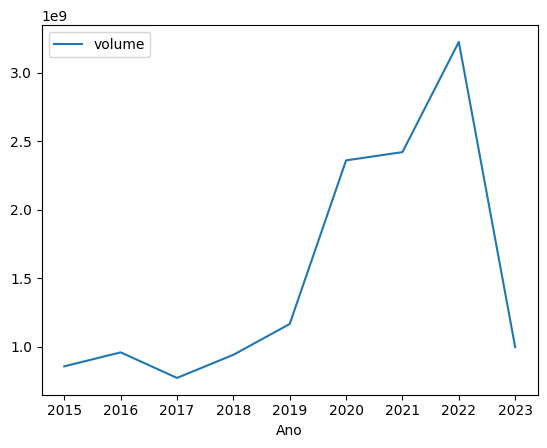

In [52]:
ibov_yf[['volume','Ano']].groupby(['Ano']).sum().plot();

Precisamos lembrar que os dados de 2023 estao incompletos

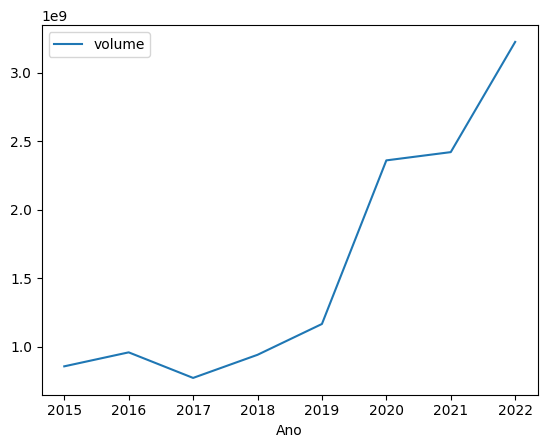

In [53]:
# Filtrando os dados sem o ano de 2023
ibov_yf[ibov_yf.Ano != 2023][['volume','Ano']].groupby(['Ano']).sum().plot();

Separando o conjunto de dados por grupos

In [54]:
# Agrupando por ano e pegando somente a coluna resultado
ibov_yf_ano = ibov_yf.groupby('Ano')['resultado']

# Com o método get_group podemos fazer um filtro, passando o ano que desejarmos
ibov_yf_ano.get_group(2023)

Date
2023-01-02   -3.321791
2023-01-03   -2.077536
2023-01-04    1.121287
2023-01-05    2.073405
2023-01-06    1.225841
                ...   
2023-04-18    0.138658
2023-04-19   -2.119382
2023-04-20    0.436904
2023-04-24   -0.402426
2023-04-25   -0.699395
Name: resultado, Length: 78, dtype: float64

### 3.8.1 Aplicando funções com groupby

Vamos calcular o coeficiente de variação (desvio / média, expresso em valor absoluto e %)

In [72]:
# Definindo a função para calcular o coeficiente de variação
def coef_variacao(x):
  return abs((x.std() / x.mean()) * 100)

In [62]:
print(np.array([1,2,3,4]))

coef_variacao(np.array([1,2,3,4]))

[1 2 3 4]


44.721359549995796

Podemos agora aplicar a função com o groupby

Vamos calcular o coeficiente de variação (desvio / média, expresso em valor absoluto e %) para os resultados diários separando os dados em dias positivos e negativos

In [67]:
ibov_yf.head()

,open,high,low,close,volume,Data,resultado,result_binario,resultado_tres,dia_semana,Ano,Mes,Mes_numerico
Date,,,,,,,,,,,,,
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100,2015-01-05,-2.051039,negativo,negativo,Monday,2015,January,1
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300,2015-01-06,1.018583,positivo,maior_que_1%,Tuesday,2015,January,1
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800,2015-01-07,3.045770,positivo,maior_que_1%,Wednesday,2015,January,1
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900,2015-01-08,0.970422,positivo,zero_a_1%,Thursday,2015,January,1
2015-01-09,49955.0,49955.0,48501.0,48840.0,2999200,2015-01-09,-2.208518,negativo,negativo,Friday,2015,January,1


In [70]:
# Após o groupby pegamos apenas a coluna resultado
ibov_yf.groupby(['result_binario'])['resultado'].apply(coef_variacao)

result_binario
negativo    109.513104
positivo     93.430629
Name: resultado, dtype: float64

In [74]:
# Podemos fazer o mesmo utilizando funções lambda e o filtro da coluna vai direto na função
ibov_yf.groupby(['result_binario'])\
          .apply(lambda x: abs((x.resultado.std() / x.resultado.mean()) * 100) )

result_binario
negativo    109.513104
positivo     93.430629
dtype: float64

Aplicando um teste estatístico para cada grupo.

Calcularemos a normalidade dos dados.

In [75]:
from scipy import stats

O jeito mais lento seria fazer filtros pra cada grupo de resultado binário

In [78]:
# Calculando para os resultados positivos
stats.normaltest(ibov_yf[ibov_yf.result_binario =='positivo']['volume']).pvalue

7.482887267751796e-28

In [79]:
# Calculando para os resultados negativos
stats.normaltest(ibov_yf[ibov_yf.result_binario =='negativo']['volume']).pvalue

7.784569709076769e-30

Com o groupby e a função .agg é mais prático:

In [85]:
ibov_yf[['volume','result_binario']].groupby('result_binario')\
                          .agg(p_value=('volume', lambda x: stats.normaltest(x).pvalue))
                          #Nomear a coluna passando uma tupla com a coluna e a função que vai ser aplicada

,p_value
result_binario,
negativo,7.784570e-30
positivo,7.482887e-28
